In [ ]:
import numpy as np
def compute_vector_length(vector):
    vector = np.array(vector)
    length_vector = np.linalg.norm(vector)
    return length_vector
compute_vector_length([1,2,3])

In [ ]:
def compute_dot_product(x,y):
    s = 0
    for i in range(len(x)):
        s += x[i]*y[i]
    return s
compute_dot_product([1,2,3],[1,1,1])

In [ ]:
def matrix_multi_vector(matrix,vector):
    new_matrix = []
    for i in range(len(matrix)):
        s = 0
        for j in range(len(matrix[0])):
            s += matrix[i][j] * vector[j]
        new_matrix.append(s)
    return new_matrix
matrix_multi_vector([[1,2,3],[5,6,7],[8,9,10]], [22,3,4])

In [ ]:
import numpy as np
def matrix_multi_vector(matrix1,matrix2):
    matrix1 = np.array(matrix1)
    matrix2 = np.array(matrix2)
    return matrix1 @ matrix2
matrix_multi_vector([[1,2],[3,4],[5,6]],[[2,3,4,5],[7,8,9,10]])

'''#Matrix A: A =[[a b] [c d]]
, A ∈ R2∗2
• Determinant of A ∈ R2∗2

: det(A) = ad − bc

• if det(A) ̸= 0 A is invertible
• Inverse Matrix: A^-1 =
1/det(A)(d −b
−c a)'''

In [12]:
def inverse_matrix(matrix):
    matrix = np.array(matrix)
    return np.linalg.inv(matrix)
inverse_matrix([[1,2,99],[4,45,644],[7,8,29]])


array([[ 0.16668111, -0.03180243,  0.13721837],
       [-0.19029463,  0.0287695 ,  0.01074523],
       [ 0.0122617 , -0.00025997, -0.00160312]])

• A ∈ Rn∗n

, I(identity matrix) ∈ Rn∗n
, v ∈ Rn

• Eigenvalue (λ): det(A − λI) = 0
• Eigenvector (v): Av = λv ⇐⇒ (A − λI)v = 0
• Normalize vector: v
∥ v ∥
, vi = p
vi
Σn
1
v
2

In [9]:
def compute_eigenvalues_eigenvectors(matrix):
    matrix = np.array(matrix)
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

• Data (vector x, y): x = {x1, ..., xN } y = {y1, ..., yN }
• Cosine Similarity: cs(x, y) = x · y
∥ x ∥∥ y ∥
=
Σ
n
p
1xiyi
Σn
1x
2
i
p
Σn
1
y
2
i

In [ ]:
def compute_cosine(v1,v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [4]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))


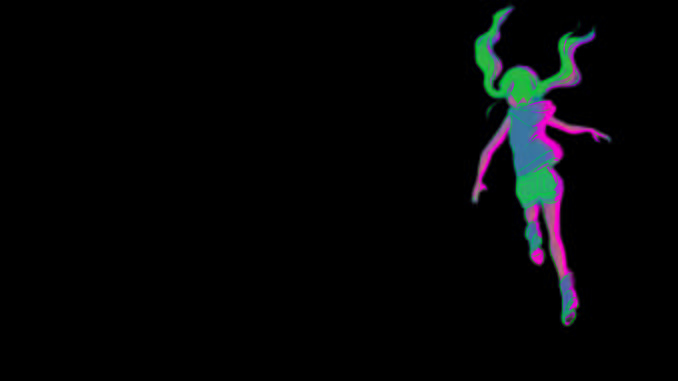

(381, 678, 3)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.      

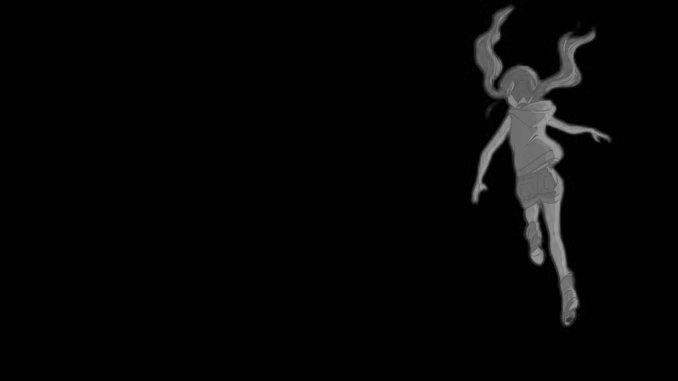

(381, 678)


In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Giả sử original_background_resized_img và object_resized_img đã được định nghĩa trước đó
# original_background_resized_img = ...
# object_resized_img = ...

# Tính toán sự khác biệt giữa hai hình ảnh
differences = cv2.absdiff(bg1_image, ob_image)
cv2_imshow(differences)
print(differences.shape)

# Tính toán sự khác biệt đơn kênh
differences_single = np.sum(differences, axis=2) / 3.0
print(differences_single[0])

# Chuyển đổi kiểu dữ liệu
differences_single = differences_single.astype(np.uint8)
cv2_imshow(differences_single)
print(differences_single.shape)


In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def compute_binary_mask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

# Giả sử difference_single_channel là một ma trận đơn kênh
difference_single_channel = np.array([
    [6, 10, 100],
    [5, 12, 50]
])

binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)


In [7]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(
        bg1_image,
        ob_image
    )

    binary_mask = compute_binary_mask(difference_single_channel)

    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output
